In [2]:
# 1

import pandas as pd

cities = pd.DataFrame({
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
    "Population": [347949, 975551, 233839, 583056]
})

cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
cities[["Kommun"]]

,Kommun
0,Malmö
1,Stockholm
2,Uppsala
3,Göteborg


In [4]:
cities[cities["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [5]:
cities_by_pop = cities.sort_values(by = "Population", ascending = False)

cities_by_pop

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
cities_by_pop.iloc[0:3]

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [7]:
cities["% of total population"] = round(cities["Population"] / 10379295 * 100, 1)

cities

,Kommun,Population,% of total population
0,Malmö,347949,3.4
1,Stockholm,975551,9.4
2,Uppsala,233839,2.3
3,Göteborg,583056,5.6


In [8]:
# 2

import pandas as pd

cities_df = pd.read_excel("komtopp50_2020.xlsx", sheet_name = "Totalt", skiprows = 6, names = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"])

#cities_df = cities_df.reset_index()

cities_df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [9]:
cities_df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [10]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int64  
 1   Rang 2019       290 non-null    int64  
 2   Kommun          290 non-null    object 
 3   Folkmängd 2020  290 non-null    int64  
 4   Folkmängd 2019  290 non-null    int64  
 5   Förändring      290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


In [11]:
cities_df.describe()

,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [12]:
cities_df = cities_df.sort_values(by = "Folkmängd 2020", ascending = False)

cities_df.iloc[-5:]

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309
12,290,290,Bjurholm,2387,2408,-0.872093


In [13]:
cities_df["Folkmängd 2020"].sum()

10379295

In [14]:
cities_df["Folkmängd 2019"].sum()

10327589

/var/folders/0m/cql4ykyj31g3clgv2px4mnhw0000gp/T/ipykernel_49879/526391101.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

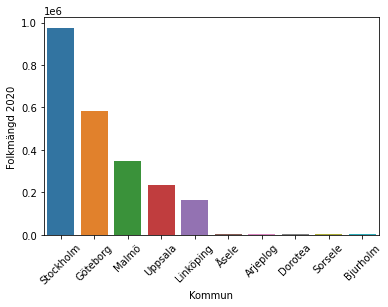

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

temp_df = cities_df.head()

fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

sns.barplot(data = cities_df.head().append(cities_df.tail()), x = "Kommun", y = "Folkmängd 2020")

In [82]:
# 3

import pandas as pd

file = "komtopp50_2020.xlsx"

female_df = pd.read_excel(file, sheet_name = "Kvinnor", skiprows = 6, names = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"])
female_df["Kön"] = "Kvinna"

male_df = pd.read_excel(file, sheet_name = "Män", skiprows = 6, names = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"])
male_df["Kön"] = "Man"

female_df[female_df["Kommun"] == "Piteå"] = 0.0

female_df = pd.to_numeric(female_df, errors = "ignore")

female_df.info()

TypeError: arg must be a list, tuple, 1-d array, or Series

In [70]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int64  
 1   Rang 2019       290 non-null    int64  
 2   Kommun          290 non-null    object 
 3   Folkmängd 2020  290 non-null    int64  
 4   Folkmängd 2019  290 non-null    int64  
 5   Förändring      290 non-null    float64
 6   Kön             290 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 16.0+ KB


In [68]:
tot_df = pd.merge(female_df, male_df, how = "inner")

tot_df

ValueError: You are trying to merge on object and float64 columns. If you wish to proceed you should use pd.concat